# The Credit Card dataset (Fraud detection)
The dataset ``creditcard.csv'' is available at https://github.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/blob/master/creditcard.csv.

Class
0    284315
1       492
Name: count, dtype: int64
Classification with SplitVotingEnsemble...


5-fold:   0%|          | 0/5 [00:00<?, ?it/s]

,measure
ROC-AUC,0.982±0.005
Accuracy,0.999±0.000
BA,0.925±0.012
Precision,0.821±0.028
Recall,0.925±0.012
MCC,0.738±0.036
cm,"[[284077, 238], [73, 419]]"


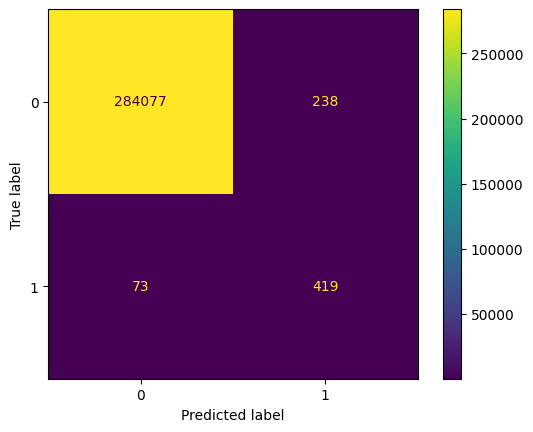

In [2]:
from svelearn.models.splitvotingens import SplitVotingEnsemble
from svelearn.validation.crossvalidate import skfold_cv
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
myscorer = {'ROC-AUC':      (roc_auc_score, {'multi_class':'ovr', 'average':'macro'}),
            'Accuracy'  :  (accuracy_score , {}),
            'BA'  :       (balanced_accuracy_score , {}),
            'Precision' : (precision_score, {'pos_label': 1, 'average':'macro'}),
            'Recall' :    (recall_score   , {'pos_label': 1, 'average':'macro'}),
            'MCC' :       (matthews_corrcoef, {}), 
            }
import pandas as pd
clf = RandomForestClassifier()
svclf = SplitVotingEnsemble(clf, n_voters=50)
data = pd.read_csv("creditcard.csv")
X = data.drop(columns=['Class'])
Y = data['Class']
print(Y.value_counts())
df_scores, scores, predictions = skfold_cv(X, Y, svclf, n_splits=5, seed=0, show_progress=True, verbose=True, scorer=myscorer, precision=3)
df_scores